#### **L**inear **D**iscriminant **A**nalysis (LDA)
* Author : Sabari Murugan S
* GitHub : https://github.com/sabarimurugans47
* License: Educational use only. Please credit if reused.

What is LDA?
* Like PCA, it is an dimensionality reduction technique.
* PCA aims to find an axis which capture most of the variance, LDA aims to find axis which projects the classes with maximum separation.
* LDA is for supervise classification problems.
* **Small datasets**: LDA can work fine on small datasets, but it may overfit if the number of features is close to or larger than the number of samples (the “small sample size problem”).

* **Large datasets**: With more samples, LDA tends to be more stable because the covariance estimates are more reliable.


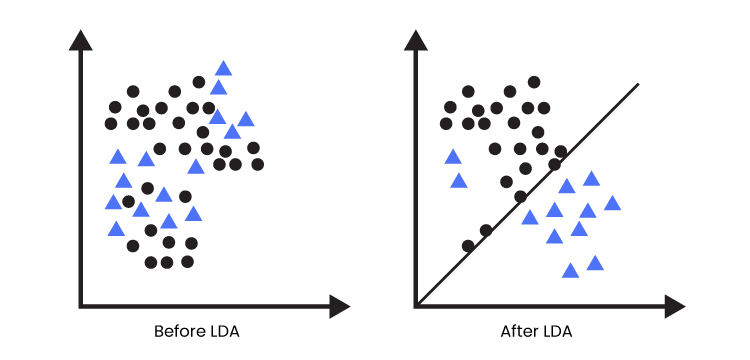

In [29]:
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import pandas as pd

In [30]:
iris=load_iris(as_frame=True)
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)

In [31]:
df['species']=iris.target

In [32]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [33]:
df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [34]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [35]:
import matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline

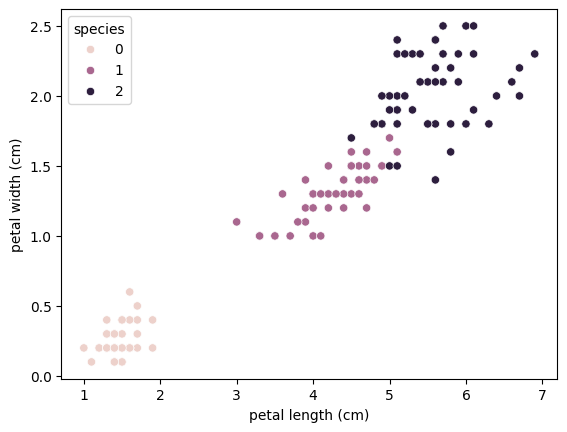

In [36]:
sns.scatterplot(x=df['petal length (cm)'],y=df['petal width (cm)'],hue=df['species'])
plt.show()

##### Overlapping between class 1 and 2

In [37]:
pca=PCA(n_components=2)
from sklearn.preprocessing import StandardScaler
X=df.drop('species',axis=1)
y=df['species']

In [38]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [39]:
pca=PCA(n_components=2)
comp=pca.fit_transform(X_scaled)
pca.explained_variance_

array([2.93808505, 0.9201649 ])

In [ ]:
comp[:,0]

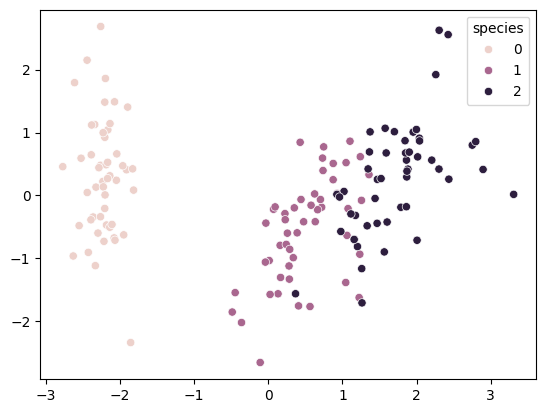

In [41]:
sns.scatterplot(x=comp[:,0],y=comp[:,1],hue=df['species'])
plt.show()

##### PCA didn't separated classes well.

In [42]:
# Implementing LDA

lda=LinearDiscriminantAnalysis(n_components=2,solver='svd')
comp1=lda.fit_transform(X_scaled,y)
lda.get_params()

{'covariance_estimator': None,
 'n_components': 2,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

In [43]:
lda.priors_ #Proportions of classes 
lda.explained_variance_ratio_ 

array([0.9912126, 0.0087874])

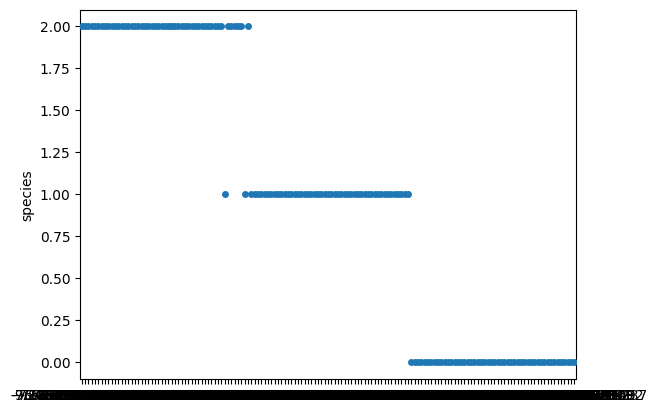

In [44]:
sns.stripplot(x=comp1[:,0], y=df['species'], jitter=True) # !D plot
plt.show()

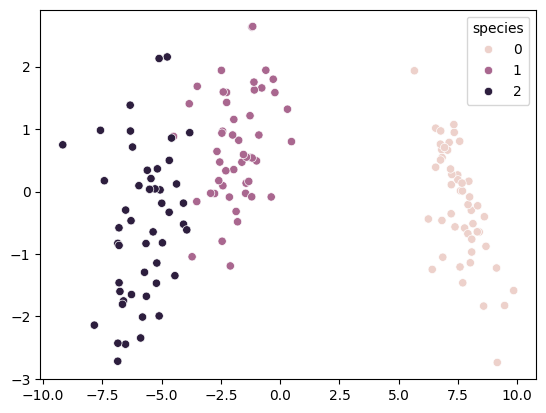

In [45]:
sns.scatterplot(x=comp1[:,0],y=comp1[:,1],hue=df['species'])
plt.show()

##### LDA separates classes better.

In [46]:
#Training Logistic Regression with LDA Components

from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X_scaled,y,test_size=0.2,random_state=2,shuffle=True)
%time log.fit(Xtrain,ytrain)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,log.predict(Xtest)) # with all features

0.9333333333333333

In [49]:
df2=pd.DataFrame({'PC1':comp1[:,0]}) #With only one LDA component

In [ ]:
Xtrain,Xtest,ytrain,ytest=train_test_split(df2,df['species'],test_size=0.2,random_state=2,shuffle=True)
%time log.fit(Xtrain,ytrain)

In [51]:
accuracy_score(ytest,log.predict(Xtest)) # LDA may give best accuracy, but it may overfit

1.0

__________________________________________________________________________________________________________________________________________________________________________